## Problem Set 04
### AST 8110, Fall 2022
##### Tyler Barna

In [36]:
## Importing packages (some of these may not be useful)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import time
#bigstart = time.time()


import sys
import os
import astropy
import astropy.units as u
import astropy.constants as const
import astropy.coordinates as coord
import random

from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from numpy.linalg import norm ## to calculate magnitude of vector

from tqdm import tqdm
from scipy import meshgrid
from scipy.stats import binned_statistic as binstat
from scipy.integrate import quad, dblquad ## to integrate
from scipy.signal import argrelextrema as extrema 


## Set Seed
random.seed(8110)

Consider a commonly used elliptical lensing potential that has the form

$$
\begin{equation}
\Psi \left(R\right) = b R \left[ 1 + \gamma \text{cos} \left(2 \theta \right) \right]
\end{equation}$$

where $b$ and $\gamma$ are constants, $\theta$ is a polar angle in the lens plane, and $R$ is the distance in the lens plane from the lens center.


### (a)
Derive the expression for the deflection angles in x and y directions

### (b)
Derive the expression for $\kappa$, $\gamma_1$, and $\gamma_2$ making sure to simplify these as much as possible. 

What is the relation between $\kappa$ and $\gamma = \sqrt{\gamma_1^2 + \gamma_2^2}$?

### (c)
Find the expression for $\text{det}\left[ A \right]$, the determinant of the magnification matrix, simplifying it as much as possible.

### (d)

On the same plot, plot the critical curve and caustic for SISell using the parameter set $\left(b,\gamma \right) = \left(1, 0.05\right)$.

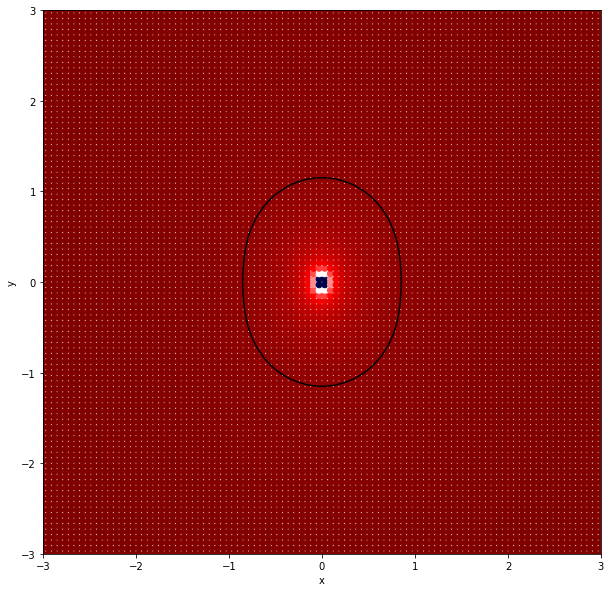

In [41]:
## create function
x,y = np.linspace(-3,3,100), np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)

def determ(x,y,b,gamma):
    det = 1-  ((b*x**2+b*y**2)*((1-3*gamma)*x**2+(1+3*gamma)*y**2))/(x**2+y**2)**(5/2)
    factor = b/(2*(x**2+y**2)**(3/2))
    term1 = 1
    term2 = (3*gamma*(y**2-x**2))/(x**2+y**2)
    #det = 1- factor*(term1+term2)
    #det =  b/(2*(x**2+y**2)**(3/2)) * (1 + (3*gamma*(y**2-x**2))/(x**2+y**2))
    return det

## plot for gamma = 0.05

fig, ax = plt.subplots(figsize=(12,10))
c = ax.contour(X,Y,determ(X,Y,1,0.05),levels=[0],colors='black')
col = ax.scatter(X,Y,c=determ(X,Y,1,0.05),cmap='seismic')
#fig = plt.figure(figsize=(12,10),facecolor='white')
#ax = fig.add_subplot(111)
# ax.set_xscale('symlog')
# ax.set_yscale('symlog')
ax.set_xlabel('x',fontsize=10)
ax.set_ylabel('y',fontsize=10)
#surface = ax.plot_surface(X,Y,determ(X,Y,1,0.05),cmap=cm.jet,linewidth=0,antialiased=True)
#fig.colorbar(col,norm=colors.CenteredNorm(vmin=-25,vmax=25));
plt.show()

### (e)

On the same plot, plot the critical curve and caustic for SISell using the parameter set $\left(b,\gamma \right) = \left(1, 0.15\right)$.